In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/processed/data.csv')

In [3]:
df.shape

(7816, 8)

In [4]:
df.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Yamaha SZR 150cc 2012,2012,34000.0,first,bengaluru,NaN,12.0,24000.0
1,Hero CD Dawn 100cc 2005,2005,28000.0,first,ghaziabad,72.0,7.0,10000.0
2,Bajaj Avenger Street 220 2017,2017,5947.0,first,chennai,53.0,19.0,80000.0
3,Jawa Standard 295CC Dual ABS BS6 2020,2020,2700.0,first,mumbai,NaN,27.0,160000.0
4,Hero Xpulse 200cc BS6 2021,2021,628.0,first,gwalior,46.4,17.8,110000.0


In [5]:
df.describe()

,model_year,kms_driven,mileage,power,price
count,7816.000000,5685.000000,6887.000000,7373.000000,7.781000e+03
mean,2015.232728,24044.275638,46.688470,18.819380,8.312375e+04
std,3.766466,30572.214968,16.752272,9.211988,7.897726e+04
min,1950.000000,0.000000,5.000000,7.000000,2.000000e+03
25%,2014.000000,9488.000000,35.000000,14.000000,4.000000e+04
50%,2016.000000,17933.000000,40.000000,18.700000,6.850000e+04
75%,2018.000000,30000.000000,60.000000,21.000000,1.120000e+05
max,2021.000000,1000000.000000,104.000000,197.300000,3.000000e+06


# Handle model_name

### There are too many models, let try to create a brand category using the model name.

In [6]:
df['brand'] = df['model_name'].apply(lambda x: ' '.join(x.split()[:1]))

In [7]:
df.sample(5)

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand
7689,Bajaj Avenger 220cc 2014,2014,17000.0,first,thane,40.0,19.0,40000.0,Bajaj
5728,Bajaj Pulsar RS200 ABS 2016,2016,NaN,second,bangalore,35.0,24.5,80000.0,Bajaj
1957,Bajaj Pulsar AS150 2015,2015,19500.0,first,pune,53.0,16.8,42000.0,Bajaj
7412,Hero Karizma R 223cc 2008,2008,30000.0,second,delhi,40.0,17.0,16900.0,Hero
956,Hero CBZ Xtreme 150cc 2013,2013,62000.0,second,sholinganallur,65.0,NaN,16700.0,Hero


In [8]:
df.brand.value_counts()

Bajaj               2234
Royal               1663
Hero                 895
Yamaha               786
TVS                  615
Honda                578
KTM                  532
Suzuki               222
UM                   127
Jawa                  42
Mahindra              35
Harley-Davidson       33
Hyosung               14
Benelli                9
Husqvarna              8
Kawasaki               6
BenelliImperiale       4
Fb                     4
Ducati                 3
Triumph                2
MV                     1
Yazdi                  1
yamaha                 1
Aprilia                1
Name: brand, dtype: int64

### We can also extract the engine details as cc from model_name

In [9]:
import re
def extract_cc(val):
    match =  re.search(r"\d{2,}(cc)", val) 
    if match:
        return match.group().replace('cc','')
    else:
        return None
    

df['engine'] = df['model_name'].apply(extract_cc)

In [10]:
df.sample(5)

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand,engine
6346,Royal Enfield Classic 350cc 2017,2017,2750.0,first,gurgaon,35.0,19.8,134100.0,Royal,350
854,Honda CB Unicorn 150cc 2009,2009,NaN,second,thane,60.0,14.0,33200.0,Honda,150
5434,KTM Duke 250cc 2018,2018,20000.0,first,pune,NaN,29.6,160000.0,KTM,250
3659,Hero Passion Xpro 110cc 2013,2013,78000.0,first,ahmedabad,55.0,NaN,27000.0,Hero,110
3536,Bajaj Avenger Street 160 ABS 2019,2019,2000.0,first,kolkata,NaN,15.3,95000.0,Bajaj,None


### We can now drop the model_name feature

In [11]:
df = df.drop('model_name',axis=1)

# Handle model_year

We can use model_year to calculate the age of the bike, Age might give us the better results or representation

In [12]:
from datetime import date
current_year = date.today().year

df['age'] = df.model_year.apply(lambda x: current_year - x if x else None )

### Let's drop the model_year

In [13]:
df = df.drop('model_year',axis=1)

# Handle kms_driven

### Missing values will be hanled latter

# Handle owner

In [14]:
# remove whitespace
df['owner'] = df.owner.str.strip()

In [15]:
df.owner.unique()

array(['first', 'second', 'fourth', 'third'], dtype=object)

In [16]:
print(df.owner.isnull().sum())

0


### Let's leave here only other things will handle during encoding

# Handle location

In [17]:
df.location.value_counts()[:10]

delhi        1475
bangalore     776
mumbai        714
jaipur        368
pune          350
chennai       340
gurgaon       314
hyderabad     307
ahmedabad     267
faridabad     179
Name: location, dtype: int64

## Let's take only top 5 locations and make other as 'others'

In [18]:
top_locations = df.location.value_counts().index[:5]
print(top_locations)

Index(['delhi', 'bangalore', 'mumbai', 'jaipur', 'pune'], dtype='object')


In [19]:
df['location'] = df.location.apply(lambda x: x if x in top_locations else 'other')

# Handle mileage

### Nothing to do much here,missing values will be handle latter

# Handle power

### Nothing to do much here,missing values will be handle latter

# Handle brand

In [20]:
# Let's check how may brands we get
print('Unique Brands :',len(df['brand'].unique()))
df['brand'].value_counts()[:10]

Unique Brands : 24


Bajaj     2234
Royal     1663
Hero       895
Yamaha     786
TVS        615
Honda      578
KTM        532
Suzuki     222
UM         127
Jawa        42
Name: brand, dtype: int64

### Let's take only top 10 brands as our base brand & make other as 'other' category

In [21]:
top_brands = df['brand'].value_counts().index[:10]
df['brand'] = df['brand'].apply(lambda x: x if x in top_brands else 'other')

### Let's change the 'Royal' to 'Royal Enfield' as the actual brand

In [22]:
df['brand'] = df.brand.str.replace('Royal','Royal Enfield')

# Reorder the columns

In [23]:
# new_order = ['brand','model_year','kms_driven','owner','location','price']
# new_order = [6,0,1,2,3,4,6,7,8,5]
# df = df[df.columns[new_order]]

In [24]:
df.sample(4)

,kms_driven,owner,location,mileage,power,price,brand,engine,age
6737,54845.0,first,delhi,55.0,7.5,10000.0,Hero,100,17
636,NaN,first,mumbai,58.0,13.0,48000.0,Yamaha,150,6
5209,6500.0,first,delhi,35.0,19.8,108000.0,Royal Enfield,350,5
2467,NaN,first,other,NaN,34.5,170000.0,Bajaj,None,2


# Outlier Detection

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7816 entries, 0 to 7815
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   kms_driven  5685 non-null   float64
 1   owner       7816 non-null   object 
 2   location    7816 non-null   object 
 3   mileage     6887 non-null   float64
 4   power       7373 non-null   float64
 5   price       7781 non-null   float64
 6   brand       7816 non-null   object 
 7   engine      5844 non-null   object 
 8   age         7816 non-null   int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 549.7+ KB


In [26]:
def box_plot(df):
    numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
    # outlier detection using boxplot
    plt.figure(figsize=(16,22))

    for i, variable in enumerate(numeric_columns):
        plt.subplot(5,4,i+1)
        plt.boxplot(df[variable],whis=1.5)
        plt.tight_layout()
        plt.title(variable)

    plt.show()

# box_plot(df)

## kms_driven

In [27]:
max_val = df['kms_driven'].quantile(.99)

min_val = df['kms_driven'].quantile(.1)

df = df[(df['kms_driven'] <= max_val) & (df['kms_driven'] > min_val)]

<AxesSubplot:>

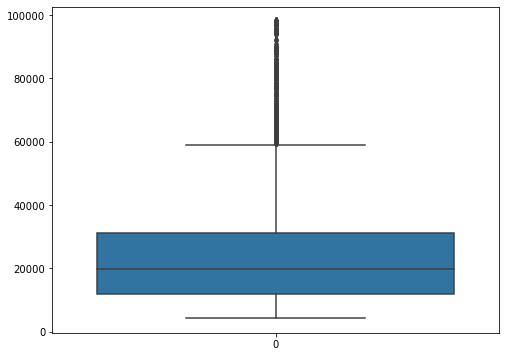

In [28]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df['kms_driven'])

## Mileage

In [29]:
max_val = df['mileage'].quantile(.99)

min_val = df['mileage'].quantile(.1)

df = df[(df['mileage'] <= max_val) & (df['mileage'] > min_val)]

<AxesSubplot:ylabel='mileage'>

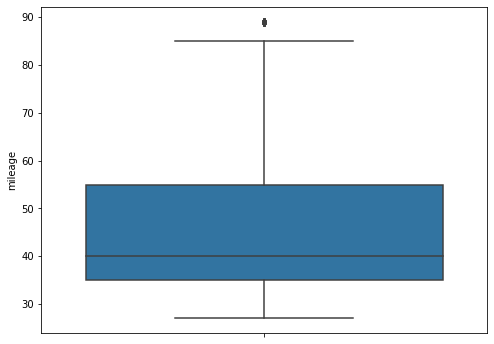

In [30]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['mileage'])

## Power

In [31]:
# plt.figure(figsize=(8,6))
# sns.boxplot(y=df['power'])

## Age

<AxesSubplot:ylabel='age'>

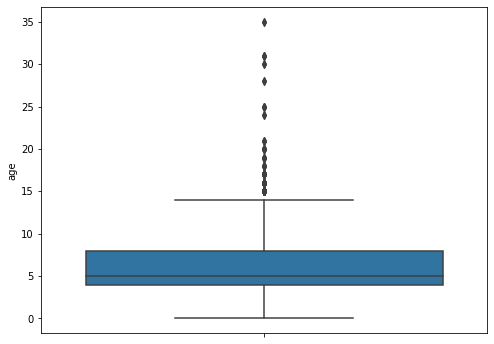

In [32]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['age'])

### More than 20 years old bikes are not that much good enough to be bought by anyone,let's take only age upto 20 years.

In [33]:
df.sample(3)

,kms_driven,owner,location,mileage,power,price,brand,engine,age
1371,5000.0,first,other,45.0,14.3,75750.0,Bajaj,None,2
3232,22000.0,first,bangalore,50.0,14.3,58000.0,Bajaj,None,5
4960,4479.0,second,other,64.0,13.0,20000.0,Bajaj,None,9


In [34]:
df = df[df['age'] <= 20]

In [35]:
df.sample(3)

,kms_driven,owner,location,mileage,power,price,brand,engine,age
4409,12500.0,first,bangalore,35.0,19.0,70000.0,Bajaj,None,4
113,6750.0,first,other,65.0,8.1,22500.0,Hero,100,3
7603,40000.0,second,other,37.0,19.0,75000.0,Royal Enfield,350,11


<AxesSubplot:ylabel='age'>

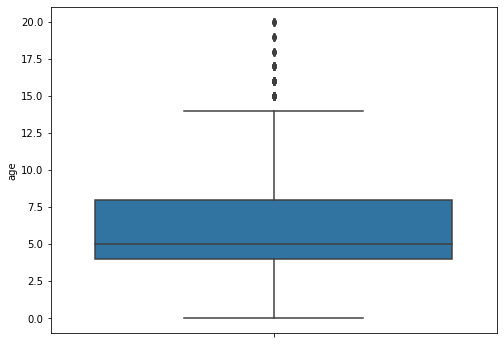

In [36]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['age'])

## Price

In [37]:
max_val = df['price'].quantile(.99)

min_val = df['price'].quantile(.1)

df = df[(df['price'] <= max_val) & (df['price'] > min_val)]

<AxesSubplot:ylabel='price'>

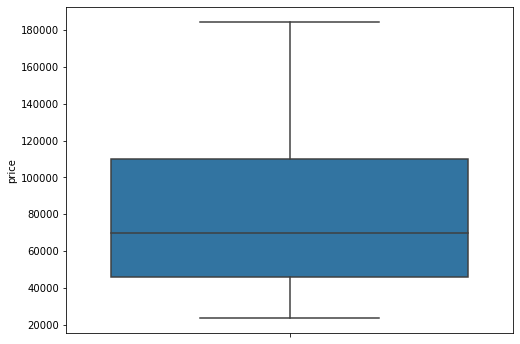

In [38]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['price'])

In [39]:
df.sample(5)

,kms_driven,owner,location,mileage,power,price,brand,engine,age
3016,28000.0,second,bangalore,45.0,17.0,35100.0,Bajaj,180,7
3136,8000.0,first,delhi,35.0,24.8,110000.0,UM,None,4
6804,9000.0,first,mumbai,40.0,14.6,90000.0,Suzuki,150,3
481,25000.0,first,delhi,38.0,21.0,31000.0,Bajaj,220,9
5892,6903.0,first,other,45.0,15.3,65000.0,Bajaj,None,2


In [40]:
df.shape

(3439, 9)

In [41]:
df.isnull().sum()

kms_driven      0
owner           0
location        0
mileage         0
power          99
price           0
brand           0
engine        588
age             0
dtype: int64

In [42]:
# fill price with mean
df.price.fillna(df.price.mean(),inplace=True)

In [43]:
df.shape

(3439, 9)

## Save

In [44]:
## Save the processed data
df.to_csv('../data/processed/processed.csv',index=False)